In [50]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import fe,describe,visual

%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [52]:
df = pd.read_csv(f"E:/gitlab/machine-learning/dataset/Modal_Antar.csv")

In [53]:
df

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status
0,44,1,7,7,10046300,4,4,5,1000000,1.0,1
1,44,1,7,7,10290000,3,6,1,1000000,1.0,1
2,28,1,5,7,5327891,2,4,2,1000000,1.0,1
3,40,1,7,9,7150000,3,4,1,1000000,1.0,1
4,41,1,3,7,5150000,3,5,1,1000000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,1
129,56,1,7,9,2250000,4,2,1,1000000,1.0,1
130,26,2,5,7,4678138,2,4,1,3000000,6.0,1
131,30,1,3,9,5200000,2,4,1,1000000,1.0,1


# Feature engineering

# change type

In [10]:
df1 = fe.change_type(df,["pengambilan_kredit"],"object")

In [11]:
describe.describe_data(df1)

'table size 133 x 11'

Dataframe has 11 columns.
There are 0 columns that have missing values.


,column_names,Data Type,Missing Values,% missing,low Value,Hi Value,stddev Value,unique
0,usia,int64,0,0.0,21,60,9,30.0
1,pengambilan_kredit,object,0,0.0,0,0,0,2.0
2,pengalaman_kerja,int64,0,0.0,2,7,2,6.0
3,jabatan_id,int64,0,0.0,3,9,1,6.0
4,pendapatan,int64,0,0.0,2250000,50000000,4470642,62.0
5,jumlah_tanggungan,int64,0,0.0,1,5,1,5.0
6,pendidikan,int64,0,0.0,2,7,1,6.0
7,kepemilikan,int64,0,0.0,1,5,1,4.0
8,pinjaman,int64,0,0.0,1000000,10000000,2298226,4.0
9,tenor_bulanan,float64,0,0.0,1,6,2,2.0


# segregate

In [21]:
categoric,numeric = fe.segregate(df)

In [24]:
categoric

""
0
1
2
3
4
...
128
129
130
131


In [25]:
numeric

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status
0,44,1,7,7,10046300,4,4,5,1000000,1.0,1
1,44,1,7,7,10290000,3,6,1,1000000,1.0,1
2,28,1,5,7,5327891,2,4,2,1000000,1.0,1
3,40,1,7,9,7150000,3,4,1,1000000,1.0,1
4,41,1,3,7,5150000,3,5,1,1000000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,1
129,56,1,7,9,2250000,4,2,1,1000000,1.0,1
130,26,2,5,7,4678138,2,4,1,3000000,6.0,1
131,30,1,3,9,5200000,2,4,1,1000000,1.0,1


# new_feature

In [70]:
features = fe.new_feature(df,num_col=["pendidikan","kepemilikan"],cat_col=['jumlah_tanggungan',"kat_status"],drop=[False,False])

In [71]:
features

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,...,log_pendidikan,sqrt_kepemilikan,log_kepemilikan,jumlah_tanggungan_1,jumlah_tanggungan_2,jumlah_tanggungan_3,jumlah_tanggungan_4,jumlah_tanggungan_5,kat_status_0,kat_status_1
0,44,1,7,7,10046300,4,4,5,1000000,1.0,...,1.386294,2.236068,1.609438,0,0,0,1,0,0,1
1,44,1,7,7,10290000,3,6,1,1000000,1.0,...,1.791759,1.000000,0.000000,0,0,1,0,0,0,1
2,28,1,5,7,5327891,2,4,2,1000000,1.0,...,1.386294,1.414214,0.693147,0,1,0,0,0,0,1
3,40,1,7,9,7150000,3,4,1,1000000,1.0,...,1.386294,1.000000,0.000000,0,0,1,0,0,0,1
4,41,1,3,7,5150000,3,5,1,1000000,1.0,...,1.609438,1.000000,0.000000,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,...,1.386294,1.000000,0.000000,0,1,0,0,0,0,1
129,56,1,7,9,2250000,4,2,1,1000000,1.0,...,0.693147,1.000000,0.000000,0,0,0,1,0,0,1
130,26,2,5,7,4678138,2,4,1,3000000,6.0,...,1.386294,1.000000,0.000000,0,1,0,0,0,0,1
131,30,1,3,9,5200000,2,4,1,1000000,1.0,...,1.386294,1.000000,0.000000,0,1,0,0,0,0,1


In [73]:
features = fe.new_feature(df,num_col=["pendidikan","kepemilikan"],cat_col=['jumlah_tanggungan',"kat_status"],drop=[False,False],log_type="positif")

In [74]:
features

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,...,log_pendidikan,sqrt_kepemilikan,log_kepemilikan,jumlah_tanggungan_1,jumlah_tanggungan_2,jumlah_tanggungan_3,jumlah_tanggungan_4,jumlah_tanggungan_5,kat_status_0,kat_status_1
0,44,1,7,7,10046300,4,4,5,1000000,1.0,...,1.098612,2.236068,1.609438,0,0,0,1,0,0,1
1,44,1,7,7,10290000,3,6,1,1000000,1.0,...,1.609438,1.000000,0.000000,0,0,1,0,0,0,1
2,28,1,5,7,5327891,2,4,2,1000000,1.0,...,1.098612,1.414214,0.693147,0,1,0,0,0,0,1
3,40,1,7,9,7150000,3,4,1,1000000,1.0,...,1.098612,1.000000,0.000000,0,0,1,0,0,0,1
4,41,1,3,7,5150000,3,5,1,1000000,1.0,...,1.386294,1.000000,0.000000,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,...,1.098612,1.000000,0.000000,0,1,0,0,0,0,1
129,56,1,7,9,2250000,4,2,1,1000000,1.0,...,0.000000,1.000000,0.000000,0,0,0,1,0,0,1
130,26,2,5,7,4678138,2,4,1,3000000,6.0,...,1.098612,1.000000,0.000000,0,1,0,0,0,0,1
131,30,1,3,9,5200000,2,4,1,1000000,1.0,...,1.098612,1.000000,0.000000,0,1,0,0,0,0,1


# transforming feature

In [29]:
fe.transforming_feature(df,["usia"],types='sqrt')

,usia,sqrt_usia
0,44,6.633250
1,44,6.633250
2,28,5.291503
3,40,6.324555
4,41,6.403124
...,...,...
128,50,7.071068
129,56,7.483315
130,26,5.099020
131,30,5.477226


In [30]:
fe.transforming_feature(df,["usia"],types='log',log_type="negative")

,usia,log_usia
0,44,3.784190
1,44,3.784190
2,28,3.332205
3,40,3.688879
4,41,3.713572
...,...,...
128,50,3.912023
129,56,4.025352
130,26,3.258097
131,30,3.401197


In [31]:
fe.transforming_feature(df,["usia"],types='log',log_type="positive")

,usia,log_usia
0,44,3.178054
1,44,3.178054
2,28,2.079442
3,40,2.995732
4,41,3.044522
...,...,...
128,50,3.401197
129,56,3.583519
130,26,1.791759
131,30,2.302585


In [41]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
res = mms.fit_transform(df["usia"].values.reshape(-1, 1)).flatten()
res = pd.DataFrame(res,columns=['age'])

In [43]:
fe.transforming_feature(res,["age"],types='logit')

,age,logit_age
0,0.589744,0.362905
1,0.589744,0.362905
2,0.179487,-1.519826
3,0.487179,-0.051293
4,0.512821,0.051293
...,...,...
128,0.743590,1.064711
129,0.897436,2.169054
130,0.128205,-1.916923
131,0.230769,-1.203973


In [46]:
df1,lmbda_best = fe.transforming_feature(df,["usia"],types='boxcox')

In [47]:
df1

,usia,boxcox_usia
0,44,11.013644
1,44,11.013644
2,28,8.417330
3,40,10.417254
4,41,10.569098
...,...,...
128,50,11.858623
129,56,12.653363
130,26,8.043934
131,30,8.777374


In [48]:
lmbda_best

0.4907400362662814

# Box-Cox Power Transformation

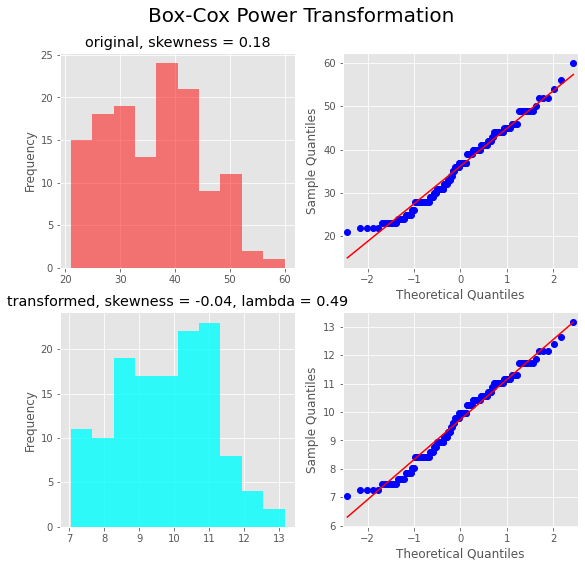

In [24]:
features = fe.box_cox_transform(df,'usia')

In [25]:
features

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status,usia_box_cox_transform
0,44,1,7,7,10046300,4,4,5,1000000,1.0,1,11.013644
1,44,1,7,7,10290000,3,6,1,1000000,1.0,1,11.013644
2,28,1,5,7,5327891,2,4,2,1000000,1.0,1,8.417330
3,40,1,7,9,7150000,3,4,1,1000000,1.0,1,10.417254
4,41,1,3,7,5150000,3,5,1,1000000,1.0,1,10.569098
...,...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,1,11.858623
129,56,1,7,9,2250000,4,2,1,1000000,1.0,1,12.653363
130,26,2,5,7,4678138,2,4,1,3000000,6.0,1,8.043934
131,30,1,3,9,5200000,2,4,1,1000000,1.0,1,8.777374


# filling_nan

In [40]:
df['null'] = df['usia']

In [41]:
df['null'][0] = np.nan
df['null'][1] = np.nan
df['null'][2] = np.nan

In [42]:
df

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status,null
0,44,1,7,7,10046300,4,4,5,1000000,1.0,1,NaN
1,44,1,7,7,10290000,3,6,1,1000000,1.0,1,NaN
2,28,1,5,7,5327891,2,4,2,1000000,1.0,1,NaN
3,40,1,7,9,7150000,3,4,1,1000000,1.0,1,40.0
4,41,1,3,7,5150000,3,5,1,1000000,1.0,1,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,1,50.0
129,56,1,7,9,2250000,4,2,1,1000000,1.0,1,56.0
130,26,2,5,7,4678138,2,4,1,3000000,6.0,1,26.0
131,30,1,3,9,5200000,2,4,1,1000000,1.0,1,30.0


In [120]:
fe.filling_nan(df,"num",['null'],type_rand="random",method="linear")

'null'

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status,null
0,44,1,7,7,10046300,4,4,5,1000000,1.0,1,29.0
1,44,1,7,7,10290000,3,6,1,1000000,1.0,1,21.0
2,28,1,5,7,5327891,2,4,2,1000000,1.0,1,41.0
3,40,1,7,9,7150000,3,4,1,1000000,1.0,1,40.0
4,41,1,3,7,5150000,3,5,1,1000000,1.0,1,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,1,50.0
129,56,1,7,9,2250000,4,2,1,1000000,1.0,1,56.0
130,26,2,5,7,4678138,2,4,1,3000000,6.0,1,26.0
131,30,1,3,9,5200000,2,4,1,1000000,1.0,1,30.0


# delete_col_nan

In [7]:
df

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status,null
0,44,1,7,7,10046300,4,4,5,1000000,1.0,1,NaN
1,44,1,7,7,10290000,3,6,1,1000000,1.0,1,NaN
2,28,1,5,7,5327891,2,4,2,1000000,1.0,1,NaN
3,40,1,7,9,7150000,3,4,1,1000000,1.0,1,40.0
4,41,1,3,7,5150000,3,5,1,1000000,1.0,1,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,1,50.0
129,56,1,7,9,2250000,4,2,1,1000000,1.0,1,56.0
130,26,2,5,7,4678138,2,4,1,3000000,6.0,1,26.0
131,30,1,3,9,5200000,2,4,1,1000000,1.0,1,30.0


Your selected dataframe has 12 columns.
There are 1 columns that have missing values.


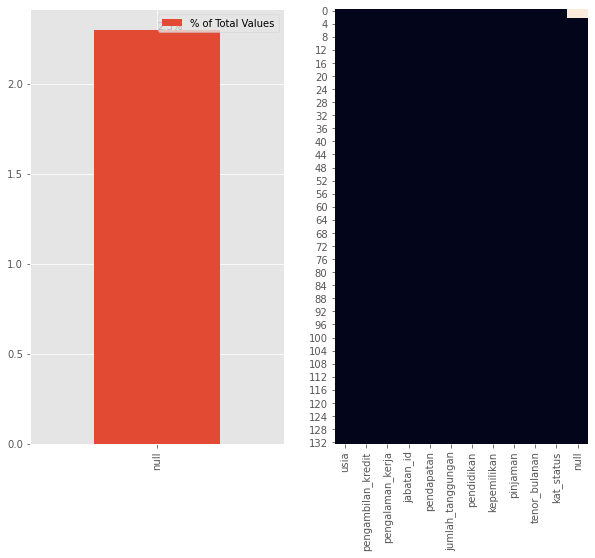

We will remove 1 columns.


,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status
0,44,1,7,7,10046300,4,4,5,1000000,1.0,1
1,44,1,7,7,10290000,3,6,1,1000000,1.0,1
2,28,1,5,7,5327891,2,4,2,1000000,1.0,1
3,40,1,7,9,7150000,3,4,1,1000000,1.0,1
4,41,1,3,7,5150000,3,5,1,1000000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,1
129,56,1,7,9,2250000,4,2,1,1000000,1.0,1
130,26,2,5,7,4678138,2,4,1,3000000,6.0,1
131,30,1,3,9,5200000,2,4,1,1000000,1.0,1


In [14]:
fe.delete_col_nan(df,2)

# drop_nan

In [24]:
fe.drop_row_nan(df,"null")

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status,null
0,40,1,7,9,7150000,3,4,1,1000000,1.0,1,40.0
1,41,1,3,7,5150000,3,5,1,1000000,1.0,1,41.0
2,31,1,6,9,6000000,3,4,1,1000000,1.0,1,31.0
3,49,1,7,9,7300000,3,3,1,1000000,1.0,1,49.0
4,22,1,2,9,5150000,1,4,2,1000000,1.0,1,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...
125,50,1,3,9,5500000,2,4,1,1000000,1.0,1,50.0
126,56,1,7,9,2250000,4,2,1,1000000,1.0,1,56.0
127,26,2,5,7,4678138,2,4,1,3000000,6.0,1,26.0
128,30,1,3,9,5200000,2,4,1,1000000,1.0,1,30.0


# add_var_denote_nan

In [29]:
fe.add_var_denote_nan(df,na_col=['null'])

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status,null,null_is_NA
0,44,1,7,7,10046300,4,4,5,1000000,1.0,1,NaN,1
1,44,1,7,7,10290000,3,6,1,1000000,1.0,1,NaN,1
2,28,1,5,7,5327891,2,4,2,1000000,1.0,1,NaN,1
3,40,1,7,9,7150000,3,4,1,1000000,1.0,1,40.0,0
4,41,1,3,7,5150000,3,5,1,1000000,1.0,1,41.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,1,50.0,0
129,56,1,7,9,2250000,4,2,1,1000000,1.0,1,56.0,0
130,26,2,5,7,4678138,2,4,1,3000000,6.0,1,26.0,0
131,30,1,3,9,5200000,2,4,1,1000000,1.0,1,30.0,0


# knn_imputation

In [43]:
test = fe.knn_imputation(df,5,'uniform')

# knn_imp_eval

In [5]:
from sklearn.ensemble import RandomForestClassifier

Mean Accuracy 1: 0.958 (0.037)
Mean Accuracy 3: 0.952 (0.041)
Mean Accuracy 5: 0.957 (0.046)
Mean Accuracy 7: 0.958 (0.049)
Mean Accuracy 9: 0.955 (0.045)
Mean Accuracy 15: 0.955 (0.045)
Mean Accuracy 18: 0.953 (0.041)
Mean Accuracy 21: 0.955 (0.050)


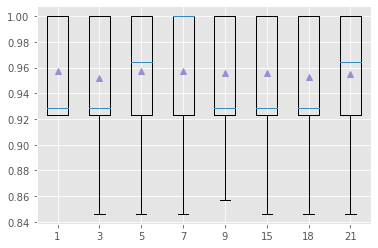

In [7]:
fe.knn_imp_eval(df.drop("kat_status" ,1),df["kat_status"],
                [1,3,5,7,9,15,18,21],RandomForestClassifier(),10,3,None)

# mapping_dict

In [8]:
dic = {1:"good",0:"bad"}

In [11]:
data,dic = fe.mapping_dict(df,["kat_status"],dic)

In [12]:
data

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status
0,44,1,7,7,10046300,4,4,5,1000000,1.0,good
1,44,1,7,7,10290000,3,6,1,1000000,1.0,good
2,28,1,5,7,5327891,2,4,2,1000000,1.0,good
3,40,1,7,9,7150000,3,4,1,1000000,1.0,good
4,41,1,3,7,5150000,3,5,1,1000000,1.0,good
...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,good
129,56,1,7,9,2250000,4,2,1,1000000,1.0,good
130,26,2,5,7,4678138,2,4,1,3000000,6.0,good
131,30,1,3,9,5200000,2,4,1,1000000,1.0,good


# mapping

In [61]:
key = [['1 bulan','6 bulan'],["good","bad"]]

In [62]:
data,dic = fe.mapping(df,["tenor_bulanan","kat_status"],'def',key=key)

In [63]:
data

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status
0,44,1,7,7,10046300,4,4,5,1000000,1 bulan,good
1,44,1,7,7,10290000,3,6,1,1000000,1 bulan,good
2,28,1,5,7,5327891,2,4,2,1000000,1 bulan,good
3,40,1,7,9,7150000,3,4,1,1000000,1 bulan,good
4,41,1,3,7,5150000,3,5,1,1000000,1 bulan,good
...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1 bulan,good
129,56,1,7,9,2250000,4,2,1,1000000,1 bulan,good
130,26,2,5,7,4678138,2,4,1,3000000,6 bulan,good
131,30,1,3,9,5200000,2,4,1,1000000,1 bulan,good


In [64]:
dic

[{1.0: '1 bulan', 6.0: '6 bulan'}, {1: 'good', 0: 'bad'}]

In [59]:
data,dic = fe.mapping(df,["tenor_bulanan","kat_status"],types='freq_encoding')

In [60]:
data

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status
0,44,1,7,7,10046300,4,4,5,1000000,0.654135,0.947368
1,44,1,7,7,10290000,3,6,1,1000000,0.654135,0.947368
2,28,1,5,7,5327891,2,4,2,1000000,0.654135,0.947368
3,40,1,7,9,7150000,3,4,1,1000000,0.654135,0.947368
4,41,1,3,7,5150000,3,5,1,1000000,0.654135,0.947368
...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,0.654135,0.947368
129,56,1,7,9,2250000,4,2,1,1000000,0.654135,0.947368
130,26,2,5,7,4678138,2,4,1,3000000,0.345865,0.947368
131,30,1,3,9,5200000,2,4,1,1000000,0.654135,0.947368


# inv_mapping

In [66]:
data,inv_dic = fe.inv_mapping(data,dic,["tenor_bulanan","kat_status"])

In [67]:
data

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status
0,44,1,7,7,10046300,4,4,5,1000000,1.0,1
1,44,1,7,7,10290000,3,6,1,1000000,1.0,1
2,28,1,5,7,5327891,2,4,2,1000000,1.0,1
3,40,1,7,9,7150000,3,4,1,1000000,1.0,1
4,41,1,3,7,5150000,3,5,1,1000000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,1
129,56,1,7,9,2250000,4,2,1,1000000,1.0,1
130,26,2,5,7,4678138,2,4,1,3000000,6.0,1
131,30,1,3,9,5200000,2,4,1,1000000,1.0,1


In [68]:
inv_dic

[{'1 bulan': 1.0, '6 bulan': 6.0}, {'good': 1, 'bad': 0}]

# Daypath and holiday

In [11]:
train_df = pd.read_csv(f'E:/gitlab/machine-learning/dataset/flight_delays_train.csv.zip')
test_df = pd.read_csv(f'E:/gitlab/machine-learning/dataset/flight_delays_test.csv.zip')

In [14]:
def feature_eng(df):
    df['DayOfWeek'] = df.DayOfWeek.map(lambda x: x.split('-')[-1]).astype('uint8')
    df['hour'] = df.DepTime.map(lambda x: x/100).astype('int32')
    return df.drop('DepTime', axis=1)

In [17]:
full_df = pd.concat([train_df.drop('dep_delayed_15min', axis=1), test_df])
full_df = feature_eng(full_df[["DepTime","DayOfWeek"]])
full_df.head()

,DayOfWeek,hour
0,7,19
1,3,15
2,5,14
3,6,10
4,6,18


In [18]:
full_df['hour'] = fe.daypart(full_df,'hour')

In [19]:
full_df['DayOfWeek'] = fe.holiday(full_df,'DayOfWeek')

In [20]:
full_df

,DayOfWeek,hour
0,holiday,evening
1,weekday,afternoon
2,weekday,afternoon
3,holiday,noon
4,holiday,evening
...,...,...
99995,weekday,morning
99996,holiday,afternoon
99997,weekday,afternoon
99998,weekday,morning


# scaling

In [23]:
fe.scaling(df,["usia","pendapatan"],'min_max')

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status,usia_min_max,pendapatan_min_max
0,44,1,7,7,10046300,4,4,5,1000000,1.0,1,0.589744,0.163273
1,44,1,7,7,10290000,3,6,1,1000000,1.0,1,0.589744,0.168377
2,28,1,5,7,5327891,2,4,2,1000000,1.0,1,0.179487,0.064458
3,40,1,7,9,7150000,3,4,1,1000000,1.0,1,0.487179,0.102618
4,41,1,3,7,5150000,3,5,1,1000000,1.0,1,0.512821,0.060733
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,1,0.743590,0.068063
129,56,1,7,9,2250000,4,2,1,1000000,1.0,1,0.897436,0.000000
130,26,2,5,7,4678138,2,4,1,3000000,6.0,1,0.128205,0.050851
131,30,1,3,9,5200000,2,4,1,1000000,1.0,1,0.230769,0.061780


In [22]:
fe.scaling(df,["usia","pendapatan"],'min_max_scale')

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status,usia_min_max_scale,pendapatan_min_max_scale
0,44,1,7,7,10046300,4,4,5,1000000,1.0,1,0.589744,0.163273
1,44,1,7,7,10290000,3,6,1,1000000,1.0,1,0.589744,0.168377
2,28,1,5,7,5327891,2,4,2,1000000,1.0,1,0.179487,0.064458
3,40,1,7,9,7150000,3,4,1,1000000,1.0,1,0.487179,0.102618
4,41,1,3,7,5150000,3,5,1,1000000,1.0,1,0.512821,0.060733
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,1,0.743590,0.068063
129,56,1,7,9,2250000,4,2,1,1000000,1.0,1,0.897436,0.000000
130,26,2,5,7,4678138,2,4,1,3000000,6.0,1,0.128205,0.050851
131,30,1,3,9,5200000,2,4,1,1000000,1.0,1,0.230769,0.061780


In [85]:
fe.scaling(df,["usia","pendapatan"],'standardization')

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status,usia_standardized,pendapatan_standardized
0,44,1,7,7,10046300,4,4,5,1000000,1.0,1,0.895731,0.824759
1,44,1,7,7,10290000,3,6,1,1000000,1.0,1,0.895731,0.879271
2,28,1,5,7,5327891,2,4,2,1000000,1.0,1,-0.938836,-0.230662
3,40,1,7,9,7150000,3,4,1,1000000,1.0,1,0.437089,0.176911
4,41,1,3,7,5150000,3,5,1,1000000,1.0,1,0.551749,-0.270452
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,1,1.583693,-0.192164
129,56,1,7,9,2250000,4,2,1,1000000,1.0,1,2.271656,-0.919129
130,26,2,5,7,4678138,2,4,1,3000000,6.0,1,-1.168157,-0.375999
131,30,1,3,9,5200000,2,4,1,1000000,1.0,1,-0.709515,-0.259268


In [83]:
fe.scaling(df,["usia","pendapatan"],'robust')

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status,usia_robust,pendapatan_robust
0,44,1,7,7,10046300,4,4,5,1000000,1.0,1,0.538462,2.453823
1,44,1,7,7,10290000,3,6,1,1000000,1.0,1,0.538462,2.577215
2,28,1,5,7,5327891,2,4,2,1000000,1.0,1,-0.692308,0.064755
3,40,1,7,9,7150000,3,4,1,1000000,1.0,1,0.230769,0.987342
4,41,1,3,7,5150000,3,5,1,1000000,1.0,1,0.307692,-0.025316
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,1,1.000000,0.151899
129,56,1,7,9,2250000,4,2,1,1000000,1.0,1,1.461538,-1.493671
130,26,2,5,7,4678138,2,4,1,3000000,6.0,1,-0.846154,-0.264234
131,30,1,3,9,5200000,2,4,1,1000000,1.0,1,-0.538462,0.000000


# Imbalance

In [25]:
df = pd.read_csv(f'E:\gitlab\machine-learning\dataset\heart_failure_clinical_records_dataset.csv')

In [26]:
X = df.drop(["DEATH_EVENT"], axis=1)
y = df["DEATH_EVENT"]

In [27]:
X_s, y_s = fe.imba(X, y,'smote')

Original ratio
DEATH_EVENT
0              203
1               96
dtype: int64

Number of neighbors to be considered for each sample 48

SMOTE ratio
DEATH_EVENT
0              203
1              203
dtype: int64


In [66]:
X_s, y_s = fe.imba(X, y,'bordersmote')

Original ratio
DEATH_EVENT
0              203
1               96
dtype: int64

Number of neighbors to be considered for each sample 48
Number of neighbors to consider to determine if a sample is danger 48

Borderline-SMOTE ratio
DEATH_EVENT
0              203
1              203
dtype: int64


In [67]:
X_s, y_s = fe.imba(X, y,'adasyn')

Original ratio
DEATH_EVENT
0              203
1               96
dtype: int64

Number of neighbors to be considered for each sample 48

ADASYN ratio
DEATH_EVENT
0              203
1              192
dtype: int64


In [10]:
X_s, y_s = fe.imba(X, y,'nearmiss')

Original ratio
DEATH_EVENT
0              203
1               96
dtype: int64

NearMiss ratio
DEATH_EVENT
0              96
1              96
dtype: int64


In [11]:
X_s, y_s = fe.imba(X, y,'ros')

Original ratio
DEATH_EVENT
0              203
1               96
dtype: int64

Random Over Sampler ratio
DEATH_EVENT
0              203
1              203
dtype: int64


In [13]:
X_s, y_s = fe.imba(X, y,'rus')

Original ratio
DEATH_EVENT
0              203
1               96
dtype: int64

Random Under Sampler ratio
DEATH_EVENT
0              96
1              96
dtype: int64


In [31]:
X_s, y_s = fe.imba(X, y,types ='combine',strat_1=0.5,strat_2=0.75)

Original ratio
DEATH_EVENT
0              203
1               96
dtype: int64

Combining RandomOverSampler and RandomUnderSampler
DEATH_EVENT
0              134
1              101
dtype: int64


In [31]:
X_s, y_s = fe.imba(X, y,types ='tomeklinks')

Original ratio
DEATH_EVENT
0              203
1               96
dtype: int64

Tomeklinks
DEATH_EVENT
0              163
1               96
dtype: int64


# decode

In [40]:
fe.encode(df,['jabatan_id'],"ohe")

,usia,pengambilan_kredit,pengalaman_kerja,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status,jabatan_id_7,jabatan_id_9,jabatan_id_6,jabatan_id_8,jabatan_id_5,jabatan_id_3
0,44,1,7,10046300,4,4,5,1000000,1.0,1,0,0,0,1,0,0
1,44,1,7,10290000,3,6,1,1000000,1.0,1,0,0,0,1,0,0
2,28,1,5,5327891,2,4,2,1000000,1.0,1,0,0,0,1,0,0
3,40,1,7,7150000,3,4,1,1000000,1.0,1,0,0,0,0,0,1
4,41,1,3,5150000,3,5,1,1000000,1.0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,5500000,2,4,1,1000000,1.0,1,0,0,0,0,0,1
129,56,1,7,2250000,4,2,1,1000000,1.0,1,0,0,0,0,0,1
130,26,2,5,4678138,2,4,1,3000000,6.0,1,0,0,0,1,0,0
131,30,1,3,5200000,2,4,1,1000000,1.0,1,0,0,0,0,0,1


In [44]:
fe.encode(df,['pengambilan_kredit'],"count", normalize=False)

Count encoding: ['pengambilan_kredit']


,usia,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status,pengambilan_kredit_count_encoded
0,44,7,7,10046300,4,4,5,1000000,1.0,1,91
1,44,7,7,10290000,3,6,1,1000000,1.0,1,91
2,28,5,7,5327891,2,4,2,1000000,1.0,1,91
3,40,7,9,7150000,3,4,1,1000000,1.0,1,91
4,41,3,7,5150000,3,5,1,1000000,1.0,1,91
...,...,...,...,...,...,...,...,...,...,...,...
128,50,3,9,5500000,2,4,1,1000000,1.0,1,91
129,56,7,9,2250000,4,2,1,1000000,1.0,1,91
130,26,5,7,4678138,2,4,1,3000000,6.0,1,42
131,30,3,9,5200000,2,4,1,1000000,1.0,1,91


In [54]:
fe.encode(df,['tenor_bulanan'],"target",label_col='kat_status')

Target Encoding: ['tenor_bulanan']


,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,kat_status,tenor_bulanan_target_encoded
0,44,1,7,7,10046300,4,4,5,1000000,1,1.000000
1,44,1,7,7,10290000,3,6,1,1000000,1,1.000000
2,28,1,5,7,5327891,2,4,2,1000000,1,1.000000
3,40,1,7,9,7150000,3,4,1,1000000,1,1.000000
4,41,1,3,7,5150000,3,5,1,1000000,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1,1.000000
129,56,1,7,9,2250000,4,2,1,1000000,1,1.000000
130,26,2,5,7,4678138,2,4,1,3000000,1,0.847826
131,30,1,3,9,5200000,2,4,1,1000000,1,1.000000


In [58]:
train,topic_res = fe.encode(df,'usia',"woe",label_col='kat_status',label=['good','bad'])

In [59]:
train

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status,usia_WoE_Encode
0,44,1,7,7,10046300,4,4,5,1000000,1.0,1,1.098612
1,44,1,7,7,10290000,3,6,1,1000000,1.0,1,1.098612
2,28,1,5,7,5327891,2,4,2,1000000,1.0,1,13.815511
3,40,1,7,9,7150000,3,4,1,1000000,1.0,1,13.815511
4,41,1,3,7,5150000,3,5,1,1000000,1.0,1,13.815511
...,...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,1,13.815511
129,56,1,7,9,2250000,4,2,1,1000000,1.0,1,13.815511
130,26,2,5,7,4678138,2,4,1,3000000,6.0,1,13.815511
131,30,1,3,9,5200000,2,4,1,1000000,1.0,1,13.815511


In [60]:
topic_res

usia
21    13.815511
22     1.098612
23     1.609438
24    13.815511
25    13.815511
26    13.815511
28    13.815511
29    13.815511
30    13.815511
31    13.815511
32    13.815511
33    13.815511
34    13.815511
35    13.815511
36     1.386294
37     2.079442
39     1.609438
40    13.815511
41    13.815511
42    13.815511
43    13.815511
44     1.098612
45    13.815511
46    13.815511
49    13.815511
50    13.815511
52    13.815511
54    13.815511
56    13.815511
60    13.815511
Name: WoE, dtype: float64

# pivot table

In [6]:
fe.pivot(df,'pengalaman_kerja')

,jabatan_id,jumlah_tanggungan,kat_status,kepemilikan,pendapatan,pendidikan,pengambilan_kredit,pinjaman,tenor_bulanan,usia
pengalaman_kerja,,,,,,,,,,
2,8.4762,2.0000,1.0000,1.3810,5.482900e+06,4.0952,1.4286,2.523810e+06,2.9048,32.6190
3,7.8039,1.9412,0.9608,1.4314,5.759242e+06,4.2549,1.3725,2.666667e+06,3.0588,34.8824
4,7.8333,2.0833,0.9167,1.3333,5.957692e+06,4.1667,1.2500,1.666667e+06,2.2500,33.1667
5,7.2727,2.4545,1.0000,1.3636,7.914310e+06,3.8636,1.1818,1.545455e+06,1.9091,36.1364
6,7.6250,2.6250,0.8750,1.0000,7.771912e+06,4.0000,1.2500,4.250000e+06,3.5000,39.3750
7,7.9474,3.6316,0.8421,1.4737,6.795532e+06,4.2632,1.2632,2.789474e+06,2.5789,44.2632


In [7]:
fe.pivot(df,['pengalaman_kerja',"jabatan_id"])

jumlah_tanggungan  kat_status  kepemilikan  \
pengalaman_kerja jabatan_id                                               
2                3                         NaN         NaN          NaN   
                 5                         NaN         NaN          NaN   
                 6                      2.0000      1.0000       1.0000   
                 7                      3.0000      1.0000       1.5000   
                 8                         NaN         NaN          NaN   
                 9                      1.7500      1.0000       1.3750   
3                3                         NaN         NaN          NaN   
                 5                      1.3333      1.0000       1.6667   
                 6                      1.6667      0.6667       2.0000   
                 7                      1.7500      0.9500       1.6500   
                 8                         NaN         NaN          NaN   
                 9                      2.2000      1.0000       1.1600   
4                3                         NaN         NaN          NaN   
                 5                      3.0000      1.0000       1.0000   
                 6                         NaN         NaN          NaN   
                 7                      2.0000      0.8000       1.4000   
                 8                         NaN         NaN          NaN   
                 9                      2.0000      1.0000       1.3333   
5                3                      5.0000      1.0000       1.0000   
                 5                      1.0000      1.0000       2.0000   
                 6                         NaN         NaN          NaN   
                 7                      2.2857      1.0000       1.4286   
                 8                         NaN         NaN          NaN   
                 9                      2.6667      1.0000       1.1667   
6                3                         NaN         NaN          NaN   
                 5                         NaN         NaN          NaN   
                 6                      3.0000      1.0000       1.0000   
                 7                      2.6667      0.6667       1.0000   
                 8                      2.0000      1.0000       1.0000   
                 9                      3.0000      1.0000       1.0000   
7                3                         NaN         NaN          NaN   
                 5                         NaN         NaN          NaN   
                 6                      3.0000      1.0000       1.0000   
                 7                      3.5000      0.5000       2.3333   
                 8                      4.0000      1.0000       1.5000   
                 9                      3.7778      1.0000       1.0000   

                               pendapatan  pendidikan  pengambilan_kredit  \
pengalaman_kerja jabatan_id                                                 
2                3                    NaN         NaN                 NaN   
                 5                    NaN         NaN                 NaN   
                 6           6.200000e+06      4.0000              1.0000   
                 7           7.450000e+06      5.0000              1.5000   
                 8                    NaN         NaN                 NaN   
                 9           4.946306e+06      3.8750              1.4375   
3                3                    NaN         NaN                 NaN   
                 5           1.090000e+07      6.0000              1.3333   
                 6           7.400000e+06      5.3333              1.3333   
                 7           5.914146e+06      4.3500              1.4000   
                 8                    NaN         NaN                 NaN   
                 9           4.821537e+06      3.8400              1.3600   
4                3                    NaN         NaN                 NaN   
                 5     

In [57]:
fe.pivot(df,'pengalaman_kerja','usia',type_rand='mean',col=None,m=None,fv=np.nan)

,usia
pengalaman_kerja,
2,32.6190
3,34.8824
4,33.1667
5,36.1364
6,39.3750
7,44.2632


In [9]:
fe.pivot(df,'pengalaman_kerja','usia',type_rand=['mean','count'],col=None,m=None,fv=np.nan)

,mean,count
,usia,usia
pengalaman_kerja,,
2,32.6190,21
3,34.8824,51
4,33.1667,12
5,36.1364,22
6,39.3750,8
7,44.2632,19


In [58]:
fe.pivot(df,'pengalaman_kerja','usia',type_rand='median',col=None,m=None,fv=np.nan)

,usia
pengalaman_kerja,
2,32
3,36
4,35
5,37
6,35
7,44


In [60]:
fe.pivot(df,'pengalaman_kerja','pinjaman',type_rand='sum',col=None,m=None,fv=np.nan)

,pinjaman
pengalaman_kerja,
2,53000000
3,136000000
4,20000000
5,34000000
6,34000000
7,53000000


In [63]:
fe.pivot(df,'pengalaman_kerja','pinjaman',type_rand='sum',col="pendidikan",m=None,fv=np.nan)

pendidikan,2,3,4,5,6,7
pengalaman_kerja,,,,,,
2,NaN,6000000.0,39000000,8000000.0,NaN,NaN
3,NaN,13000000.0,97000000,6000000.0,20000000.0,NaN
4,NaN,1000000.0,18000000,NaN,NaN,1000000.0
5,2000000.0,3000000.0,27000000,NaN,2000000.0,NaN
6,1000000.0,NaN,32000000,NaN,1000000.0,NaN
7,1000000.0,1000000.0,34000000,NaN,17000000.0,NaN


In [11]:
fe.pivot(df,['pengalaman_kerja'],['pinjaman'],type_rand='sum',col=["pendidikan"],m=None,fv=np.nan)

pinjaman                                               \
pendidikan                2           3         4          5           6   
pengalaman_kerja                                                           
2                       NaN   6000000.0  39000000  8000000.0         NaN   
3                       NaN  13000000.0  97000000  6000000.0  20000000.0   
4                       NaN   1000000.0  18000000        NaN         NaN   
5                 2000000.0   3000000.0  27000000        NaN   2000000.0   
6                 1000000.0         NaN  32000000        NaN   1000000.0   
7                 1000000.0   1000000.0  34000000        NaN  17000000.0   

                             
pendidikan                7  
pengalaman_kerja             
2                       NaN  
3                       NaN  
4                 1000000.0  
5                       NaN  
6                       NaN  
7                       NaN

In [12]:
fe.pivot(df,['pengalaman_kerja'],['pinjaman'],type_rand='sum',col=["pendidikan"],m=None,fv=0)

pinjaman                                                
pendidikan              2         3         4        5         6        7
pengalaman_kerja                                                         
2                       0   6000000  39000000  8000000         0        0
3                       0  13000000  97000000  6000000  20000000        0
4                       0   1000000  18000000        0         0  1000000
5                 2000000   3000000  27000000        0   2000000        0
6                 1000000         0  32000000        0   1000000        0
7                 1000000   1000000  34000000        0  17000000        0

In [64]:
fe.pivot(df,'pengalaman_kerja','pinjaman',type_rand='min',col=None,m=None,fv=np.nan)

,pinjaman
pengalaman_kerja,
2,1000000
3,1000000
4,1000000
5,1000000
6,1000000
7,1000000


In [69]:
fe.pivot(df,'pengalaman_kerja','pinjaman',type_rand='count',col=None,m=None,fv=np.nan)

,pinjaman
pengalaman_kerja,
2,21
3,51
4,12
5,22
6,8
7,19


In [70]:
fe.pivot(df,'pengalaman_kerja','pinjaman',type_rand='std',col=None,m=None,fv=np.nan)

,pinjaman
pengalaman_kerja,
2,1.990453e+06
3,2.169485e+06
4,1.302678e+06
5,1.262170e+06
6,3.955105e+06
7,3.029099e+06


In [71]:
fe.pivot(df,'pengalaman_kerja','pinjaman',type_rand='mode',col=None,m=None,fv=np.nan)

,pinjaman
pengalaman_kerja,
2,"([1000000], [13])"
3,"([1000000], [30])"
4,"([1000000], [9])"
5,"([1000000], [18])"
6,"([1000000], [4])"
7,"([1000000], [13])"


In [14]:
fe.pivot(df,["pendidikan","pengalaman_kerja"],['pendapatan','pinjaman'],type_rand='sum',m=None,fv=0)

pendapatan  pinjaman
pendidikan pengalaman_kerja                      
2          2                          0         0
           3                          0         0
           4                          0         0
           5                   10178576   2000000
           6                    2250000   1000000
           7                    2250000   1000000
3          2                   10040000   6000000
           3                   26335486  13000000
           4                    4600576   1000000
           5                   15397866   3000000
           6                          0         0
           7                    7300000   1000000
4          2                   75300900  39000000
           3                  191458425  97000000
           4                   49891734  18000000
           5                   91538386  27000000
           6                   53425300  32000000
           7                   79725100  34000000
5          2                   29800000   8000000
           3                   10300000   6000000
           4                          0         0
           5                          0         0
           6                          0         0
           7                          0         0
6          2                          0         0
           3                   65627429  20000000
           4                          0         0
           5                   57000000   2000000
           6                    6500000   1000000
           7                   39840000  17000000
7          2                          0         0
           3                          0         0
           4                   17000000   1000000
           5                          0         0
           6                          0         0
           7                          0         0

In [15]:
fe.pivot(df,["pendidikan","pengalaman_kerja"],['pendapatan','pinjaman'],type_rand='sum',m=True,fv=0)

pendapatan   pinjaman
pendidikan pengalaman_kerja                       
2          2                          0          0
           3                          0          0
           4                          0          0
           5                   10178576    2000000
           6                    2250000    1000000
           7                    2250000    1000000
3          2                   10040000    6000000
           3                   26335486   13000000
           4                    4600576    1000000
           5                   15397866    3000000
           6                          0          0
           7                    7300000    1000000
4          2                   75300900   39000000
           3                  191458425   97000000
           4                   49891734   18000000
           5                   91538386   27000000
           6                   53425300   32000000
           7                   79725100   34000000
5          2                   29800000    8000000
           3                   10300000    6000000
           4                          0          0
           5                          0          0
           6                          0          0
           7                          0          0
6          2                          0          0
           3                   65627429   20000000
           4                          0          0
           5                   57000000    2000000
           6                    6500000    1000000
           7                   39840000   17000000
7          2                          0          0
           3                          0          0
           4                   17000000    1000000
           5                          0          0
           6                          0          0
           7                          0          0
All                           845759778  330000000

# pivot js

In [78]:
fe.pivot_js(df,'result')

# pivot monthly

In [8]:
df= pd.read_csv(f'E:/gitlab/machine-learning/dataset/coffee_sales.csv', parse_dates=['order_date'])

In [10]:
df.columns = ['date', 'market', 'region', 'product_category', 'product', 'cost',
       'inventory', 'net_profit', 'sales']

In [11]:
df

,date,market,region,product_category,product,cost,inventory,net_profit,sales
0,2010-01-01,Wholesale,Central,Coffee,Amaretto,89,777,94,219
1,2010-01-01,Wholesale,Central,Coffee,Columbian,83,623,68,190
2,2010-01-01,Wholesale,Central,Coffee,Decaf Irish Cream,95,821,101,234
3,2010-01-01,Wholesale,Central,Tea,Green Tea,44,623,30,100
4,2010-01-01,Wholesale,Central,Espresso,Caffe Mocha,54,456,54,134
...,...,...,...,...,...,...,...,...,...
4243,2011-12-01,Retail,West,Espresso,Caffe Latte,24,567,19,60
4244,2011-12-01,Retail,West,Espresso,Caffe Mocha,65,403,34,155
4245,2011-12-01,Retail,West,Espresso,Decaf Espresso,80,1079,76,188
4246,2011-12-01,Retail,West,Coffee,Columbian,72,461,86,188


In [17]:
fe.report_pivot(df,2010,'M',['region','product_category'],key_value=['sales'],
                type_rand=['sum'],m=None,fv=0)

sum                                   \
                              sales                                    
date                     2010-01-31 2010-02-28 2010-03-31 2010-04-30   
region  product_category                                               
Central Coffee                 2663       2708       2703       2815   
        Espresso               2370       2432       2467       2446   
        Herbal tea             2664       2704       2691       2735   
        Tea                    2649       2659       2702       2774   
East    Coffee                 2105       2061       2126       2258   
        Espresso               1853       1966       1907       1935   
        Herbal tea             1609       1621       1638       1753   
        Tea                    1213       1272       1250       1267   
South   Coffee                 1207       1260       1265       1280   
        Espresso               1770       1803       1781       1790   
        Herbal tea              999       1019       1009        995   
        Tea                       0          0          0          0   
West    Coffee                 2339       2298       2313       2332   
        Espresso               2723       2759       2796       2798   
        Herbal tea             2602       2702       2739       2884   
        Tea                    2789       2828       2858       2881   

                                                                      \
                                                                       
date                     2010-05-31 2010-06-30 2010-07-31 2010-08-31   
region  product_category                                               
Central Coffee                 2878       3008       3148       3012   
        Espresso               2497       2497       2556       2554   
        Herbal tea             2795       2908       2976       2961   
        Tea                    2840       2863       2912       2909   
East    Coffee                 2347       2625       2735       2673   
        Espresso               1896       2071       1992       1984   
        Herbal tea             1779       1795       1926       1677   
        Tea                    1319       1404       1395       1469   
South   Coffee                 1369       1429       1489       1579   
        Espresso               1849       1896       1923       1923   
        Herbal tea              978       1016       1036       1139   
        Tea                       0          0          0          0   
West    Coffee                 2351       2495       2541       2523   
        Espresso               2829       2897       2992       3077   
        Herbal tea             2965       3133       3380       3386   
        Tea                    3000       3088       3160       3163   

                                                                      
                                                                      
date                     2010-09-30 2010-10-31 2010-11-30 2010-12-31  
region  product_category                                              
Central Coffee                 2734       2694       2632       2813  
        Espresso               2394       2391       2282       2320  
        Herbal tea             2747       2734       2631       2669  
        Tea                    2851       2762       2670       2860  
East    Coffee                 2362       2094       2066       2288  
        Espresso               1887       2124       2076       1981  
        Herbal tea             1539       1544       1605       1755  
        Tea                    1337       1339       1231       1249  
South   Coffee                 1389       1341       1294       1378  
        Espresso               1844       1820       1796       1813  
        Herbal tea             1033       1119       1115       1100  
        Tea                       0          0          0          0  
West    Coffee

# Binning

In [59]:
result1,result2 = fe.binning(df,'usia', [25,30,35,40,45,50,55], labels=None,left=False,right=True)

min value from usia = 21
min value from usia = 60
Result label binning
Original value 	 Label 	 Total
21-25 		 0 	 18
25-30 		 1 	 21
30-35 		 2 	 20
35-40 		 3 	 29
40-45 		 4 	 26
45-50 		 5 	 12
50-55 		 6 	 4
55-60 		 7 	 2


In [60]:
result1

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status,usia_flag
0,44,1,7,7,10046300,4,4,5,1000000,1.0,1,4
1,44,1,7,7,10290000,3,6,1,1000000,1.0,1,4
2,28,1,5,7,5327891,2,4,2,1000000,1.0,1,1
3,40,1,7,9,7150000,3,4,1,1000000,1.0,1,3
4,41,1,3,7,5150000,3,5,1,1000000,1.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,1,5
129,56,1,7,9,2250000,4,2,1,1000000,1.0,1,7
130,26,2,5,7,4678138,2,4,1,3000000,6.0,1,1
131,30,1,3,9,5200000,2,4,1,1000000,1.0,1,1


In [61]:
result2

,limit,labels,count
0,21-25,0,18
1,25-30,1,21
2,30-35,2,20
3,35-40,3,29
4,40-45,4,26
5,45-50,5,12
6,50-55,6,4
7,55-60,7,2


# binning fix value

In [66]:
fe.cut(df,'usia',10,'cut')

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status,usia_flag
0,44,1,7,7,10046300,4,4,5,1000000,1.0,1,"(40.5, 44.4]"
1,44,1,7,7,10290000,3,6,1,1000000,1.0,1,"(40.5, 44.4]"
2,28,1,5,7,5327891,2,4,2,1000000,1.0,1,"(24.9, 28.8]"
3,40,1,7,9,7150000,3,4,1,1000000,1.0,1,"(36.6, 40.5]"
4,41,1,3,7,5150000,3,5,1,1000000,1.0,1,"(40.5, 44.4]"
...,...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,1,"(48.3, 52.2]"
129,56,1,7,9,2250000,4,2,1,1000000,1.0,1,"(52.2, 56.1]"
130,26,2,5,7,4678138,2,4,1,3000000,6.0,1,"(24.9, 28.8]"
131,30,1,3,9,5200000,2,4,1,1000000,1.0,1,"(28.8, 32.7]"


In [67]:
fe.cut(df,'usia',10,'qcut')

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status,usia_flag
0,44,1,7,7,10046300,4,4,5,1000000,1.0,1,"(41.0, 44.0]"
1,44,1,7,7,10290000,3,6,1,1000000,1.0,1,"(41.0, 44.0]"
2,28,1,5,7,5327891,2,4,2,1000000,1.0,1,"(24.0, 28.0]"
3,40,1,7,9,7150000,3,4,1,1000000,1.0,1,"(39.2, 41.0]"
4,41,1,3,7,5150000,3,5,1,1000000,1.0,1,"(39.2, 41.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,1,"(48.4, 60.0]"
129,56,1,7,9,2250000,4,2,1,1000000,1.0,1,"(48.4, 60.0]"
130,26,2,5,7,4678138,2,4,1,3000000,6.0,1,"(24.0, 28.0]"
131,30,1,3,9,5200000,2,4,1,1000000,1.0,1,"(28.0, 30.6]"


# discretisation

# equal_width

In [58]:
fe.discretisation(main_data=df,col='usia',bins=10,types="equal_width")

value of bin edges:
[array([21. , 24.9, 28.8, 32.7, 36.6, 40.5, 44.4, 48.3, 52.2, 56.1, 60. ])]
Detail unique value:
usia_equal_width
4.0                 24
5.0                 21
2.0                 19
1.0                 18
0.0                 15
3.0                 13
7.0                 11
6.0                  9
8.0                  2
9.0                  1
dtype: int64


,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status,usia_equal_width
0,44,1,7,7,10046300,4,4,5,1000000,1.0,1,5.0
1,44,1,7,7,10290000,3,6,1,1000000,1.0,1,5.0
2,28,1,5,7,5327891,2,4,2,1000000,1.0,1,1.0
3,40,1,7,9,7150000,3,4,1,1000000,1.0,1,4.0
4,41,1,3,7,5150000,3,5,1,1000000,1.0,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,1,7.0
129,56,1,7,9,2250000,4,2,1,1000000,1.0,1,8.0
130,26,2,5,7,4678138,2,4,1,3000000,6.0,1,1.0
131,30,1,3,9,5200000,2,4,1,1000000,1.0,1,2.0


# equal_freq

In [60]:
fe.discretisation(main_data=df,col='usia',bins=10,types="equal_freq")

value of bin edges:
[array([21. , 24. , 28. , 30.6, 33. , 37. , 39.2, 41. , 44. , 48.4, 60. ])]
Detail unique value:
usia_equal_freq
2.0                19
8.0                17
5.0                15
9.0                14
4.0                13
7.0                13
3.0                12
0.0                11
1.0                10
6.0                 9
dtype: int64


,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status,usia_equal_freq
0,44,1,7,7,10046300,4,4,5,1000000,1.0,1,8.0
1,44,1,7,7,10290000,3,6,1,1000000,1.0,1,8.0
2,28,1,5,7,5327891,2,4,2,1000000,1.0,1,2.0
3,40,1,7,9,7150000,3,4,1,1000000,1.0,1,6.0
4,41,1,3,7,5150000,3,5,1,1000000,1.0,1,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,1,9.0
129,56,1,7,9,2250000,4,2,1,1000000,1.0,1,9.0
130,26,2,5,7,4678138,2,4,1,3000000,6.0,1,1.0
131,30,1,3,9,5200000,2,4,1,1000000,1.0,1,2.0


# Discretize By kmeans

In [61]:
fe.discretisation(main_data=df,col='usia',bins=5,types="kmeans")

value of bin edges:
[array([21.        , 28.74715909, 36.37847222, 44.17222222, 52.28333333,
       60.        ])]
Detail unique value:
usia_kmeans
2.0            45
0.0            33
1.0            32
3.0            20
4.0             3
dtype: int64


,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status,usia_kmeans
0,44,1,7,7,10046300,4,4,5,1000000,1.0,1,2.0
1,44,1,7,7,10290000,3,6,1,1000000,1.0,1,2.0
2,28,1,5,7,5327891,2,4,2,1000000,1.0,1,0.0
3,40,1,7,9,7150000,3,4,1,1000000,1.0,1,2.0
4,41,1,3,7,5150000,3,5,1,1000000,1.0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,1,3.0
129,56,1,7,9,2250000,4,2,1,1000000,1.0,1,4.0
130,26,2,5,7,4678138,2,4,1,3000000,6.0,1,0.0
131,30,1,3,9,5200000,2,4,1,1000000,1.0,1,1.0


# Discretize By DecisionTree

## single param

In [62]:
res_1 = fe.discretisation(main_data=df,col='usia',types="dtree")

In [63]:
X_1,detail = res_1(max_depth=2).fit(X=X,y=y).transform(X)

In [64]:
# see how the new column usia_tree_discret is distributed
# the values are corresponding to the proba of the prediction by the tree
X_1.head(5)

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,usia_tree_discret
0,44,1,5,9,5305334,3,3,1,1000000,1.0,0.931507
1,22,2,2,9,5150000,1,4,2,5000000,6.0,0.800000
2,37,2,5,7,4487196,2,4,2,3000000,6.0,0.931507
3,26,1,5,7,4678138,2,4,1,1000000,1.0,1.000000
4,43,2,2,9,5300000,2,4,1,5000000,6.0,0.931507


In [65]:
detail

,usia_tree_discret,usia_lower,usia_upper,count
0,0.800000,22,23,10
1,0.931507,36,60,73
2,1.000000,21,35,50


# multiple params

In [66]:
res_1 = fe.discretisation(main_data=df,col='usia',types="dtree")

In [67]:
X_1,detail = res_1(max_depth=[2,3,4,5]).fit(X=X,y=y).transform(X)

result ROC-AUC for each depth


,depth,roc_auc_mean,roc_auc_std
0,2,0.582011,0.133791
1,3,0.527116,0.016548
2,4,0.584656,0.066428
3,5,0.519841,0.113910


optimal_depth: [4]


In [68]:
# see how the new column usia_tree_discret is distributed
# the values are corresponding to the proba of the prediction by the tree
X_1.head(5)

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,usia_tree_discret
0,44,1,5,9,5305334,3,3,1,1000000,1.0,0.933333
1,22,2,2,9,5150000,1,4,2,5000000,6.0,0.750000
2,37,2,5,7,4487196,2,4,2,3000000,6.0,0.866667
3,26,1,5,7,4678138,2,4,1,1000000,1.0,1.000000
4,43,2,2,9,5300000,2,4,1,5000000,6.0,0.933333


In [69]:
detail

,usia_tree_discret,usia_lower,usia_upper,count
0,0.750000,22,22,4
1,0.800000,36,36,5
2,0.833333,23,23,6
3,0.866667,37,39,15
4,0.933333,40,44,30
5,1.000000,21,60,73


# Discretize By chimerge

In [70]:
res_1 = fe.discretisation(main_data=df,col='usia',types="chimerge")

In [71]:
X_1 = res_1(num_of_bins=5).fit(X=df,y='kat_status').transform(df)

Interval for variable usia
  variable interval  flag_0  flag_1
0     usia  -inf,23       2       9
1     usia      23+       5     117

The bins boundary created by ChiMerge
[20.9, 23, 60]

 Unique interval


,interval,count
0,"(23.0, 60.0]",122
1,"(20.898999999999997, 23.0]",11


In [72]:
X_1

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status,usia_chimerge
0,44,1,7,7,10046300,4,4,5,1000000,1.0,1,"(23.0, 60.0]"
1,44,1,7,7,10290000,3,6,1,1000000,1.0,1,"(23.0, 60.0]"
2,28,1,5,7,5327891,2,4,2,1000000,1.0,1,"(23.0, 60.0]"
3,40,1,7,9,7150000,3,4,1,1000000,1.0,1,"(23.0, 60.0]"
4,41,1,3,7,5150000,3,5,1,1000000,1.0,1,"(23.0, 60.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,1,"(23.0, 60.0]"
129,56,1,7,9,2250000,4,2,1,1000000,1.0,1,"(23.0, 60.0]"
130,26,2,5,7,4678138,2,4,1,3000000,6.0,1,"(23.0, 60.0]"
131,30,1,3,9,5200000,2,4,1,1000000,1.0,1,"(23.0, 60.0]"


# Split data

In [16]:
X,y = fe.split(df,'kat_status','array')

In [91]:
X

array([[3.6e+01, 1.0e+00, 5.0e+00, ..., 1.0e+00, 1.0e+06, 1.0e+00],
       [4.0e+01, 2.0e+00, 3.0e+00, ..., 1.0e+00, 5.0e+06, 6.0e+00],
       [3.1e+01, 2.0e+00, 3.0e+00, ..., 1.0e+00, 5.0e+06, 6.0e+00],
       ...,
       [4.0e+01, 1.0e+00, 7.0e+00, ..., 1.0e+00, 1.0e+06, 1.0e+00],
       [4.0e+01, 1.0e+00, 3.0e+00, ..., 1.0e+00, 1.0e+06, 1.0e+00],
       [2.3e+01, 1.0e+00, 3.0e+00, ..., 2.0e+00, 1.0e+06, 1.0e+00]])

In [92]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int64)

In [24]:
X,y = fe.split(df,'kat_status','df')

In [25]:
X

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan
0,44,1,5,9,5305334,3,3,1,1000000,1.0
1,22,2,2,9,5150000,1,4,2,5000000,6.0
2,37,2,5,7,4487196,2,4,2,3000000,6.0
3,26,1,5,7,4678138,2,4,1,1000000,1.0
4,43,2,2,9,5300000,2,4,1,5000000,6.0
...,...,...,...,...,...,...,...,...,...,...
128,40,1,3,9,5200000,2,4,1,1000000,1.0
129,36,1,7,8,2250000,3,4,2,1000000,1.0
130,52,1,7,6,9630000,3,6,1,1000000,1.0
131,52,1,7,9,2250000,4,4,1,1000000,1.0


In [26]:
y

0      1
1      1
2      1
3      1
4      1
      ..
128    1
129    1
130    1
131    1
132    1
Name: kat_status, Length: 133, dtype: int64